# 쿠다 과제 1

- **임의의 영문 기사를 스크랩**하여 해당 본문에서 나타나는 단어들의 유사도 및 문맥&타깃의 정답 확률을 파악해보는 과제입니다.
- 각 단계별로 유사도 측정에서 어떤 차이가 있는지 비교 분석 해볼 수 있습니다.
- 추론 기반 기법에서 문맥을 통해 타깃을 얼마나 정확하게 맞출 수 있는지 파악해볼 수 있습니다.

---

### 예시 기사 본문

https://www.nasdaq.com/articles/what-are-consensus-estimates-and-why-are-they-important

Why do stocks go up?

There are a number of reasons.

One is this: a stock often goes up if it beats expectations.

By expectations, we don’t mean in a general sense, but in a quantifiable sense, i.e. Consensus. Consensus is, essentially, the average of earnings estimates made by professionals.

You may notice that occasionally articles in the financial press refer to earnings estimates. Publishing earnings estimates is one of the functions of analysts, whose job is to research stocks. They are employed by companies such as J.P. Morgan, Goldman Sachs, Barclays, and many others and cater mostly to large, institutional investors.

Putting Consensus into Practice
Let’s start with an example and take a look at Apple (AAPL).

AAPL consensus
That refers to the average of analyst earnings estimates for the particular quarter we are in. Notice that the number is $1.00. This number will likely fluctuate as analysts adjust their numbers as the earnings date approaches.

If you are a trader, you may seek to determine whether Apple will beat or miss that $1.00. You can do that by reading research reports, following the news, reviewing management appearances, and if possible looking into scuttlebutt. You would consider laterals. And you will distill all that information into a viewpoint on earnings — perhaps Apple will make $1.05 in the quarter. Maybe you’ve found evidence that sales for laptops are higher than expected. Or perhaps you conclude that Apple will make $0.90 instead because of chip shortages.

And if you do determine that Apple will make $1.05, and Consensus remains at $1.00, all things equal, Apple stock may go up if you’re correct. However, there are exogenous factors. What if inflation skyrockets? What if interest rates rise?

Important Considerations
A company beating Consensus estimates does not *guarantee* that their stock will go up. There are times when a company will beat the Consensus earnings estimate, but its stock goes down.

That may be because the Consensus estimate may not be a “true” reflection of the actual expectations of all market participants. Analyst estimates can be stale, so what’s listed as Consensus may be higher (or lower) than it should be. For example, Consensus for Apple may be higher than it should be because not all analysts have adjusted their estimates downward for chip shortages.

Moreover, a company may beat quarterly Consensus and its stock go down because of forward-looking comments that miss expectations. To go back to Apple, the company may beat the current quarter, but provide comments that suggest they will miss expectations for the following quarter, and, as a consequence, the stock goes down. If a trader anticipated this scenario, they may want to trim their position.

While one should pay close attention to quarterly earnings reports, Consensus is also applicable to a longer-term, investor-oriented mindset. You may have noticed in the company profile “Fwd EPS (Curr Yr).” That pertains to this year’s Consensus earnings estimate, which is $5.16. Maybe you don’t care about the chip shortages temporarily impacting the stock and subscribe to a longer-term view that Apple’s on-going revenue shift toward software and services is not fully appreciated, and that will drive earnings beats over time. That could manifest in Apple exceeding $5.16 in earnings this year, as well as next year’s expectations.

The bottom line? Whether you decide to undertake short-term trades or invest with a long-term mindset, Consensus is a useful framework for understanding stock price dynamics.

Originally published on Tornado.com: What are Consensus Estimates and Why are they Important?

## 데이터 전처리
 - NLTK를 활용해 스크랩한 기사 본문을 전처리 해야합니다. 
 - 앞으로 항상 데이터 전처리 과정은 기본이 될 것입니다.
 - 데이터 분석, AI, NLP에서 전처리에 소모되는 시간이 70%가 넘습니다.
 - 전처리 절차 전 python 가상환경을 미리 구축해 추후 실습에 지장이 없도록 합니다.
 - 구글 코랩을 사용해도 무방합니다.

먼저 기사에서 가져온 본문을 토큰화, 불용어 제거, 일정 길이 이하의 단어 제거, 소문자화, 표제어 추출, 어간 추출 등의 과정을 거칩니다.

https://blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=qbxlvnf11&logNo=221434157182 (출처)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/KHUDA/KHUDA_1차

/content/drive/MyDrive/KHUDA/KHUDA_1차


In [7]:
# import
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# 초기 다운로드
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
# Data Preprocessing (제공됨)
def preprocessing(text):
    # tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text)
              for word in nltk.word_tokenize(sent)]

    print( "- tokenize into words -" )
    print( tokens )
    print()
    
    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]

    print( "- remove stopwords -" )
    print( tokens )
    print()
    
    # remove words less than three letters
    tokens = [word for word in tokens if len(word) >= 3]

    print( "- remove words less than three letters -" )
    print( tokens )
    print()
    
    # lower capitalization
    tokens = [word.lower() for word in tokens]

    print( "- lower capitalization -" )
    print( tokens )
    print()
    
    # lemmatization
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]

    print( "- lemmatization -" )
    print( tokens )
    print()

    tokens = [lmtzr.lemmatize(word, 'v') for word in tokens]

    print( "- lemmatization/verb -" )
    print( tokens )
    print()

    # stemming
    stemmer = PorterStemmer()
    tokens = [ stemmer.stem(word) for word in tokens ]

    print( "- stemming -" )
    print(tokens)
    print()
    
    preprocessed_text= ' '.join(tokens)
    return preprocessed_text

1. 파일 입출력

In [56]:
# 파일 입출력

# Code
f = open('article.txt', 'r', encoding='UTF-8')
raw_data = f.read()

preprocessed_data = preprocessing(raw_data)

print(preprocessed_data)

- tokenize into words -
['Why', 'do', 'stocks', 'go', 'up', '?', 'There', 'are', 'a', 'number', 'of', 'reasons', '.', 'One', 'is', 'this', ':', 'a', 'stock', 'often', 'goes', 'up', 'if', 'it', 'beats', 'expectations', '.', 'By', 'expectations', ',', 'we', 'don', '’', 't', 'mean', 'in', 'a', 'general', 'sense', ',', 'but', 'in', 'a', 'quantifiable', 'sense', ',', 'i.e', '.', 'Consensus', '.', 'Consensus', 'is', ',', 'essentially', ',', 'the', 'average', 'of', 'earnings', 'estimates', 'made', 'by', 'professionals', '.', 'You', 'may', 'notice', 'that', 'occasionally', 'articles', 'in', 'the', 'financial', 'press', 'refer', 'to', 'earnings', 'estimates', '.', 'Publishing', 'earnings', 'estimates', 'is', 'one', 'of', 'the', 'functions', 'of', 'analysts', ',', 'whose', 'job', 'is', 'to', 'research', 'stocks', '.', 'They', 'are', 'employed', 'by', 'companies', 'such', 'as', 'J.P.', 'Morgan', ',', 'Goldman', 'Sachs', ',', 'Barclays', ',', 'and', 'many', 'others', 'and', 'cater', 'mostly', 'to'

2. 전처리 완료된 기사 본문을 변수에 저장

In [59]:
# 전처리 완료된 기사 본문

# Code
text = preprocessed_data

### 시소러스

- NLTK를 활용해서 WordNet 시소러스를 통해 단어 유사도를 확인해봅시다.

3. 2번에 수행한 변수를 리스트로 쪼개기

In [60]:
# 문장을 리스트로 쪼개기

# Code
words = preprocessed_data.split(' ')
print(words)

['whi', 'stock', 'there', 'number', 'reason', 'one', 'stock', 'often', 'go', 'beat', 'expect', 'expect', 'mean', 'gener', 'sens', 'quantifi', 'sens', 'i.e', 'consensu', 'consensu', 'essenti', 'averag', 'earn', 'estim', 'make', 'profession', 'you', 'may', 'notic', 'occasion', 'articl', 'financi', 'press', 'refer', 'earn', 'estim', 'publish', 'earn', 'estim', 'one', 'function', 'analyst', 'whose', 'job', 'research', 'stock', 'they', 'employ', 'compani', 'j.p.', 'morgan', 'goldman', 'sach', 'barclay', 'mani', 'other', 'cater', 'mostli', 'larg', 'institut', 'investor', 'put', 'consensu', 'practic', 'let', 'start', 'exampl', 'take', 'look', 'appl', 'aapl', 'aapl', 'consensu', 'that', 'refer', 'averag', 'analyst', 'earn', 'estim', 'particular', 'quarter', 'notic', 'number', '1.00', 'thi', 'number', 'like', 'fluctuat', 'analyst', 'adjust', 'number', 'earn', 'date', 'approach', 'trader', 'may', 'seek', 'determin', 'whether', 'appl', 'beat', 'miss', '1.00', 'you', 'read', 'research', 'report', 

4. 본문 중 관계가 궁금한 단어 2개를 임의로 골라 유사도 측정

In [19]:
from nltk.corpus import wordnet as wn

# 두 단어 사이의 NLTK 기준 유사도를 구하기

# Code
earn = wn.synsets('earn')[1]
stock = wn.synsets('stock')[0]
print("두 단어 사이의 nltk 유사도", earn.path_similarity(stock))

두 단어 사이의 nltk 유사도 0.1


### python import

**아래 셀부터는 common 및 model을 import 함으로써 함수들을 분리하겠습니다.
코드 작성에 참고 바랍니다.**

## 통계 기반 기법

- 통계 기반 기법을 활용해 코사인 유사도를 확인합니다.
- 성능을 개선하기 전과 후(PPMI, SVD)로 비교해 어떤 차이가 있는지 비교합니다.
- 시소러스의 유사도와 같은 값을 지향하고 있는지 비교합니다.

5. create_co_matrix 함수를 util.py에 만들기

In [61]:
import sys
sys.path.append('..') # 부모 디렉토리도 포함
from common.util import preprocess, create_co_matrix, cos_similarity
corpus, word_to_id, id_to_word = preprocess(text)

window_size = 1
vocab_size = len(id_to_word)

C = create_co_matrix(corpus, vocab_size, window_size=1) # 해당 함수를 common.util.py에 만드세요.

c0 = C[word_to_id['stock']]  # "you"의 단어 벡터
c1 = C[word_to_id['earn']]  # 'i'의 단어 벡터
print("두 단어 사이의 코사인 유사도", cos_similarity(c0, c1)) # 해당 함수를 common.util.py에 만드세요.

두 단어 사이의 코사인 유사도 0.2222222221553498


6. most_similar 함수를 만들고 util.py에 복사하기

In [62]:
# 가장 비슷한 단어를 찾는 함수
# 구현해보고 common/util.py에 복사합니다.

# Code
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
  # 1) 검색어를 꺼낸다.
    if query not in word_to_id:
        print(f'{query}(을)를 찾을 수 없습니다.')
        return 
    
    print(f'\n[query] {query}')
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # 2) 코사인 유사도 계산
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    # 3) 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(f' {id_to_word[i]}: {similarity[i]}')
        
        count +=1
        if count >= top:
            return

7. 6에서 만든 함수로 기사 본문에 등장하는 임의의 단어가 어떤 단어와 비슷한지 테스트

In [63]:
# 특정 단어가 어떤 단어와 비슷한지 직접 경험해봅시다.

# Code
most_similar('earn', word_to_id, id_to_word, C, top=5)


[query] earn
 particular: 0.5773502676927917
 guarante: 0.5773502676927917
 stale: 0.5773502676927917
 downward: 0.5773502676927917
 consensu: 0.5539117092927648


8. ppmi 함수를 util.py에 만들기

In [64]:
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C) # 해당 함수를 common.util.py에 만드세요.

np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print('Co-occurrence Matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

Co-occurrence Matrix
[[0 1 0 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
--------------------------------------------------
PPMI
[[0.    3.573 0.    ... 0.    0.    0.   ]
 [3.573 0.    4.158 ... 0.    0.    0.   ]
 [0.    4.158 0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    7.48 ]
 [0.    0.    0.    ... 0.    7.48  0.   ]]


In [65]:
from common.util import most_similar
most_similar('you', word_to_id, id_to_word, W, top=5)


[query] you
 scuttl: 0.3229513168334961
 consid: 0.30213528871536255
 research: 0.24866199493408203
 make: 0.23823301494121552
 investor-ori: 0.22871892154216766


In [66]:
# count_method_small.py
%matplotlib inline
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

9. 행렬의 시각화

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.    3.573 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    3.435 0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    

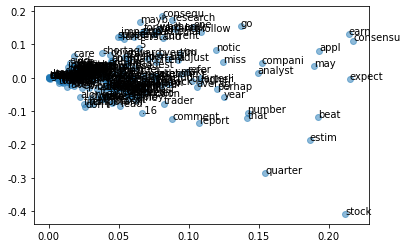

In [67]:
print(C[0])  # 동시발생 행렬
print(W[0])  # PPMI 행렬
print(U[0])  # SVD
# 2차원으로 차원 축소하기
print(U[0, :2])

# 플롯
# Code
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

---

## 추론 기반 기법

### CBOW 모델

- CBOW 모델을 구현하기 위해 맥락, 타깃을 설정하고 One-Hot 인코딩을 수행합니다.
- 구현한 모델을 평가합니다.
- 만약 성능이 좋지 않다면 어떻게 개선해야할 지 생각해보고 해당 행위를 수행합니다.

10. convert_one_hot 함수를 만들고 util.py에도 복사하기

In [68]:
# 해당 함수를 만들고 util.py에도 복사하세요.
# Code
def convert_one_hot(corpus, vocab_size):
    '''원핫 표현으로 변환
    :param corpus: 단어 ID 목록(1차원 또는 2차원 넘파이 배열)
    :param vocab_size: 어휘 수
    :return: 원핫 표현(2차원 또는 3차원 넘파이 배열)
    '''
    N = corpus.shape[0]
    if corpus.ndim == 1:
        one_hot = np.zeros((N, vocab_size), dtype=np.int32)
        for idx, word_id in enumerate(corpus):
            one_hot[idx, word_id] = 1
            
    elif corpus.ndim == 2:
        C = corpus.shape[1]
        one_hot = np.zeros((N, C, vocab_size), dtype=np.int32)
        for idx_0, word_ids in enumerate(corpus):
            for idx_1, word_id in enumerate(word_ids):
                one_hot[idx_0, idx_1, word_id] = 1
                
    return one_hot

11. create_contexts_target 함수를 util.py에 만들기

In [69]:
def create_contexts_target(corpus, window_size=1):
    '''맥락과 타깃 생성
    :param corpus: 말뭉치(단어 ID 목록)
    :param window_size: 윈도우 크기(윈도우 크기가 1이면 타깃 단어 좌우 한 단어씩이 맥락에 포함)
    :return: (맥락, 타겟)의 np.array
    '''
    target = corpus[window_size:-window_size]
    contexts = []
    
    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        # wiondow_size만큼 타겟 단어 좌우 context 가져오기
        for t in range(-window_size, window_size+1):
            if t != 0:
                cs.append(corpus[idx + t])
        contexts.append(cs)
        
    return np.array(contexts), np.array(target)

In [70]:
corpus, word_to_id, id_to_word = preprocess(text)
contexts, target = create_contexts_target(corpus, window_size=1) # 해당 함수를 common.util.py에 만드세요.

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

12. simple_cbow.py에 SimpleCBOW Class를 만들기

In [71]:
# chap03/train.py
import sys
sys.path.append('..')
from common.trainer import Trainer # 제공합니다.
from common.optimizer import Adam # 제공합니다.
from simple_cbow import SimpleCBOW # simple_cbow.py에 해당 클래스를 만드세요.
from common.util import preprocess, create_contexts_target, convert_one_hot

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id) # cbow 학습 데이터셋 생성

contexts, target = create_contexts_target(corpus, window_size) # Input에 맞는 one-hot 표현 변환
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

# 모델 초기화
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

In [72]:
# 학습
trainer.fit(contexts, target, max_epoch, batch_size)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
| 에폭 167 |  반복 81 / 118 | 시간 6[s] | 손실 1.94
| 에폭 167 |  반복 101 / 118 | 시간 6[s] | 손실 1.65
| 에폭 168 |  반복 1 / 118 | 시간 6[s] | 손실 1.75
| 에폭 168 |  반복 21 / 118 | 시간 6[s] | 손실 1.82
| 에폭 168 |  반복 41 / 118 | 시간 6[s] | 손실 1.97
| 에폭 168 |  반복 61 / 118 | 시간 6[s] | 손실 1.83
| 에폭 168 |  반복 81 / 118 | 시간 6[s] | 손실 1.95
| 에폭 168 |  반복 101 / 118 | 시간 6[s] | 손실 1.90
| 에폭 169 |  반복 1 / 118 | 시간 6[s] | 손실 1.92
| 에폭 169 |  반복 21 / 118 | 시간 6[s] | 손실 1.78
| 에폭 169 |  반복 41 / 118 | 시간 6[s] | 손실 1.77
| 에폭 169 |  반복 61 / 118 | 시간 6[s] | 손실 2.09
| 에폭 169 |  반복 81 / 118 | 시간 6[s] | 손실 1.93
| 에폭 169 |  반복 101 / 118 | 시간 6[s] | 손실 1.82
| 에폭 170 |  반복 1 / 118 | 시간 6[s] | 손실 2.03
| 에폭 170 |  반복 21 / 118 | 시간 6[s] | 손실 1.93
| 에폭 170 |  반복 41 / 118 | 시간 6[s] | 손실 1.85
| 에폭 170 |  반복 61 / 118 | 시간 6[s] | 손실 1.91
| 에폭 170 |  반복 81 / 118 | 시간 6[s] | 손실 1.89
| 에폭 170 |  반복 101 / 118 | 시간 6[s] | 손실 1.92
| 에폭 171 |  반복 1 / 118 | 시간 6[s] | 손실 1.82
| 에폭 171 |  반복 21 / 118 | 시간 6[s] | 손실 1

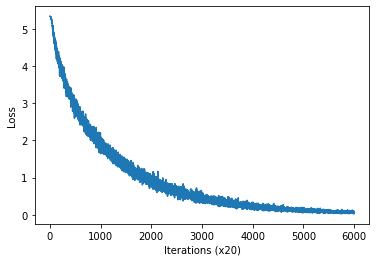

In [73]:
trainer.plot()

13. 모델에서 저장한 Word Embedding의 입력층 값 살펴보기

In [74]:
# Word Embedding 살펴보기 simple_cobw의 word_vec 참고
# W_in 입니다.

# Code
word_vecs1 = model.word_vecs1
for word_id, word in id_to_word.items():
    print(word, word_vecs1[word_id])

whi [ 3.196  5.917  0.305 -7.002 -2.56 ]
stock [ -7.775   2.633   9.317 -12.771   1.024]
there [-1.197 11.602 -3.721 10.472  1.851]
number [ 2.419  0.611  0.046 -2.784 -8.784]
reason [ -3.767  -4.344 -10.22  -10.139   6.943]
one [ 6.599  5.31  -1.704 -0.865 -2.744]
often [-6.582  9.965  1.993  4.295 -1.83 ]
go [ 2.938 13.575 -3.168  3.479  4.339]
beat [-6.806 -2.478 -2.446 -6.038 -0.062]
expect [-3.87  -3.597 -9.529 -1.914 -0.185]
mean [-11.155  -3.067   1.602   2.268  -9.516]
gener [ -3.204 -10.97    9.808  -9.699   2.775]
sens [ 9.454  7.695 16.976 11.801 -4.896]
quantifi [ -6.426 -11.293  11.662   3.761  -8.295]
i [ -4.042 -11.039   2.702 -10.014   6.507]
.e [-4.766  4.95   4.801 -6.034 -8.433]
consensu [-0.849  4.558 -6.177 -3.254  2.16 ]
essenti [ 0.802  4.478  4.354 -4.058 -7.361]
averag [-5.378 -0.926 -0.781 -1.438  1.525]
earn [-3.588  7.758 -1.28  -7.699  4.387]
estim [-3.654  7.273  0.911  0.498 -6.214]
make [ -0.713  -3.719   1.767 -14.264  -2.586]
profession [ 4.143 -3.088 

14. 모델에서 저장한 Word Embedding의 출력층 값 살펴보기

In [75]:
# Word Embedding 살펴보기, simple_cobw의 word_vec 참고
# W_out 입니다.

# Code
word_vecs2 = model.word_vecs2
for word_id, word in id_to_word.items():
    print(word, word_vecs2[word_id])

whi [ 1.572  1.395  2.52   4.384 -1.487]
stock [ 0.836  2.532 -1.458  2.741 -2.066]
there [-0.485 -1.156  2.402 -2.882 -1.603]
number [-0.667  0.457 -1.289  0.554  3.69 ]
reason [ 2.479  0.933  0.175  1.02  -2.498]
one [-2.623 -1.932  1.061 -1.755 -0.004]
often [-0.071  2.198  3.552 -0.169  1.064]
go [-2.654  1.405  2.622  0.375  0.205]
beat [ 0.502  2.323 -1.909  1.032  0.22 ]
expect [-1.252 -4.68  -1.791 -0.098 -1.511]
mean [-0.71  -4.942  1.264 -1.023 -0.188]
gener [-5.304e-01 -2.693e-03  3.934e+00  3.763e+00 -1.929e+00]
sens [-0.794 -4.26   3.911  0.272 -0.665]
quantifi [ 2.397  0.122  4.067  3.41  -0.643]
i [ 0.986  0.924  4.319  2.696 -1.374]
.e [-0.369 -3.078  0.428 -1.476  2.339]
consensu [-1.527  0.795  0.125 -2.513 -2.334]
essenti [-1.317  0.103 -1.663 -0.594  1.841]
averag [ 0.748  1.899  2.434 -1.992 -0.965]
earn [-1.163  2.467  0.243  0.608 -2.584]
estim [ 1.056  1.207  0.845 -3.085  0.339]
make [ 1.132  1.374 -1.052  5.285 -0.769]
profession [-0.745 -3.659 -0.615  1.399  

In [76]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(word_vecs2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [77]:
vocab = list(id_to_word.values())

In [81]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
df.shape

(210, 2)

In [82]:
df.head()

,x,y
whi,2.154424,5.731332
stock,-0.324428,7.576166
there,-7.233011,2.434632
number,-11.249089,-4.676090
reason,-1.980462,7.531078


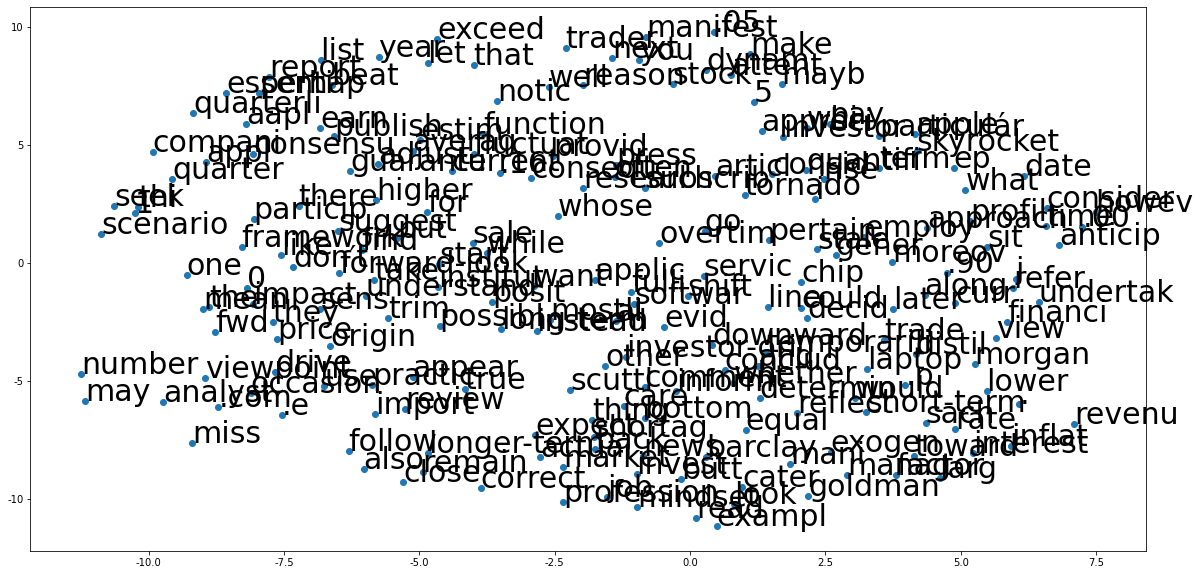

In [83]:
fig = plt.figure()
fig.set_size_inches(20, 10)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

### skip-gram 모델

- CBOW 모델 구현에 성공했으면 skip-gram 모델로도 평가합니다. 둘의 성능이 어떻게 다른지 비교해봅니다.

15. simple_skip_gram.py에 SimpleSkipGram Class 구현하기

In [85]:
# chap03/train.py
import sys
sys.path.append('..')
from common.trainer import Trainer
from common.optimizer import Adam
from simple_skip_gram import SimpleSkipGram # 해당 클래스를 구현하세요.
from common.util import preprocess, create_contexts_target, convert_one_hot

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

corpus, word_to_id, id_to_word = preprocess(preprocessed_data)
vocab_size = len(word_to_id) # cbow 학습 데이터셋 생성

contexts, target = create_contexts_target(corpus, window_size) # Input에 맞는 one-hot 표현 변환
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

# 모델 초기화
model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

In [86]:
# 학습
trainer.fit(contexts, target, max_epoch, batch_size)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
| 에폭 167 |  반복 81 / 118 | 시간 7[s] | 손실 5.43
| 에폭 167 |  반복 101 / 118 | 시간 7[s] | 손실 5.18
| 에폭 168 |  반복 1 / 118 | 시간 7[s] | 손실 5.51
| 에폭 168 |  반복 21 / 118 | 시간 7[s] | 손실 5.90
| 에폭 168 |  반복 41 / 118 | 시간 7[s] | 손실 5.52
| 에폭 168 |  반복 61 / 118 | 시간 7[s] | 손실 5.64
| 에폭 168 |  반복 81 / 118 | 시간 7[s] | 손실 5.64
| 에폭 168 |  반복 101 / 118 | 시간 7[s] | 손실 5.66
| 에폭 169 |  반복 1 / 118 | 시간 7[s] | 손실 5.27
| 에폭 169 |  반복 21 / 118 | 시간 7[s] | 손실 5.43
| 에폭 169 |  반복 41 / 118 | 시간 7[s] | 손실 5.67
| 에폭 169 |  반복 61 / 118 | 시간 7[s] | 손실 5.67
| 에폭 169 |  반복 81 / 118 | 시간 7[s] | 손실 5.52
| 에폭 169 |  반복 101 / 118 | 시간 7[s] | 손실 5.84
| 에폭 170 |  반복 1 / 118 | 시간 7[s] | 손실 5.39
| 에폭 170 |  반복 21 / 118 | 시간 7[s] | 손실 5.62
| 에폭 170 |  반복 41 / 118 | 시간 7[s] | 손실 5.38
| 에폭 170 |  반복 61 / 118 | 시간 7[s] | 손실 5.71
| 에폭 170 |  반복 81 / 118 | 시간 7[s] | 손실 5.80
| 에폭 170 |  반복 101 / 118 | 시간 7[s] | 손실 5.37
| 에폭 171 |  반복 1 / 118 | 시간 7[s] | 손실 5.69
| 에폭 171 |  반복 21 / 118 | 시간 7[s] | 손실 5

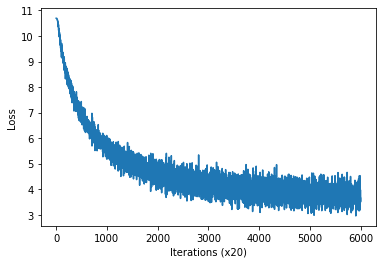

In [87]:
trainer.plot()

In [88]:
# Word Embedding 살펴보기
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

whi [-9.697  3.282  1.803 -2.035  1.554]
stock [-2.104 -0.067 -1.225  0.573  1.241]
there [ 3.429 -1.323  1.953  0.144  6.055]
number [-2.765  0.265 -1.067  0.447  3.081]
reason [ 4.348 -2.035 -2.502  4.832  9.761]
one [-2.237 -0.14   4.847  2.985  4.114]
often [-0.53  -0.259 -0.066  0.281  1.217]
go [-1.465  0.549  3.187 -0.61   2.071]
beat [-0.859 -0.888 -1.295 -0.436  1.078]
expect [ 1.039 -0.755 -0.491 -1.632  1.62 ]
mean [ 5.302 -5.511 -7.438 -1.027  0.351]
gener [ 9.991 -1.983  1.443 -1.125 -0.416]
sens [ 2.443 -1.108 -5.915  0.339 -0.368]
quantifi [10.045 -0.487  5.14  -1.495 -8.6  ]
i [ 6.419 -1.412  6.83  -2.087 -6.877]
.e [-5.072 -4.856 -9.11  -0.884  3.236]
consensu [-0.579 -1.511  2.046  0.116  0.198]
essenti [-7.816 -0.174  1.152  1.433 10.331]
averag [-2.456 -5.797  2.509  5.34   0.053]
earn [-0.881 -1.639  2.808  0.878  0.927]
estim [-0.765 -1.183 -0.671  0.701  1.928]
make [-6.924e+00 -3.335e-05 -4.054e-01 -2.284e+00 -1.862e+00]
profession [  1.333  -2.34    1.175 -10.4

In [89]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(word_vecs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [90]:
vocab = list(id_to_word.values())

In [91]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
df.shape

(210, 2)

In [92]:
df.head()

,x,y
whi,-0.177107,-3.164905
stock,-1.141972,2.073230
there,-4.634779,0.269930
number,-0.814657,1.897077
reason,-7.350744,-3.162184


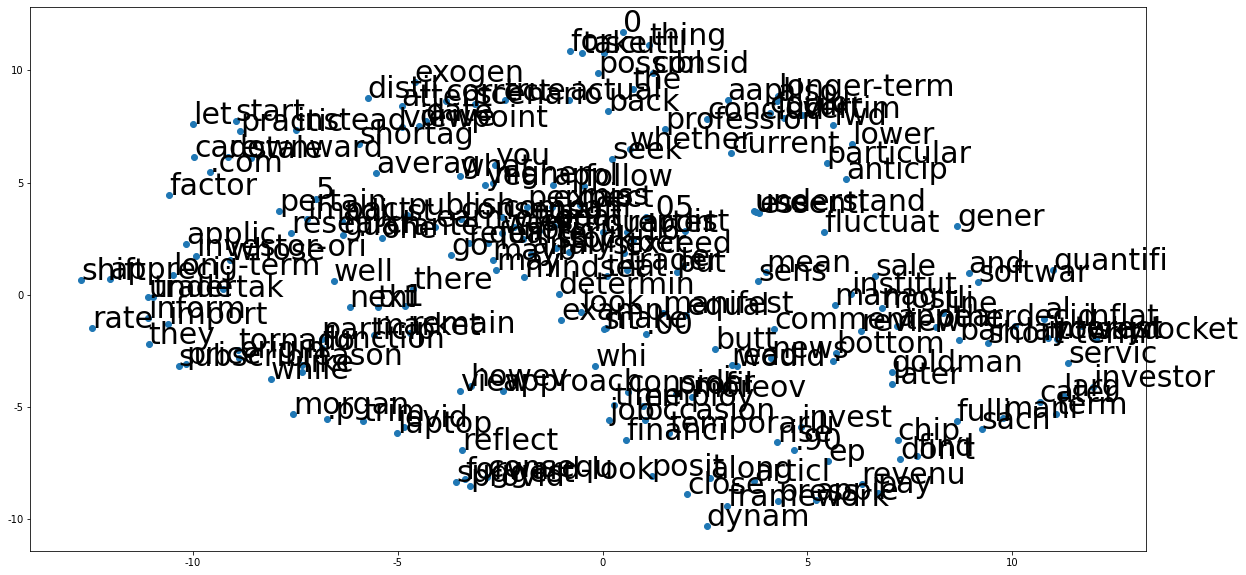

In [93]:
fig = plt.figure()
fig.set_size_inches(20, 10)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

과제가 끝났습니다. 해당 모델을 이용해 다른 것들을 해보시고 싶으신 분들은 자유롭게 구현해주시면 되겠습니다.

수고하셨습니다.